Pytorch Classifier

In [2]:
# Importing dependencies
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.attacks.evasion import DeepFool
from art.utils import load_dataset

# Disabling eager execution from TF 2 
tf.compat.v1.disable_eager_execution()

# Increasing Matplotlib font size
matplotlib.rcParams.update({"font.size": 14})

In [3]:
# Step 1a: Swap axes to PyTorch's NCHW format
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_dataset(name="mnist")


# Step 2: Create the model
# Step 1: Load the MNIST dataset



In [4]:
# Function for creating model
def create_model():
    # Defining the model
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=3, activation="relu", strides=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        Conv2D(filters=64, kernel_size=3, activation="relu", strides=2),
        Flatten(),
        Dense(units=100, activation="relu"),
        Dense(units=10, activation="softmax")
    ])

    # Compiling the model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )

    # Returning the model
    return model

In [5]:
# Instantiating the model
model = create_model()

# Training the model
model.fit(
    x=x_train, 
    y=y_train, 
    epochs=10,
    batch_size=256)





Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3176 - accuracy: 0.9025
Epoch 2/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0693 - accuracy: 0.9794
Epoch 3/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0464 - accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0353 - accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0280 - accuracy: 0.9914
Epoch 6/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0233 - accuracy: 0.9926
Epoch 7/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0188 - accuracy: 0.9940
Epoch 8/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0149 - accuracy: 0.9951
Epoch 9/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0127 - accuracy: 0

In [8]:
from art.estimators.classification import KerasClassifier
# Creating a classifier by wrapping our TF model in ART's KerasClassifier class
classifier = KerasClassifier(
    model=model, 
    clip_values=(min_pixel_value, max_pixel_value)
    )

In [37]:

attack = DeepFool(
    classifier=classifier,
    max_iter=5,
    epsilon=50,
    nb_grads=3,
    batch_size=11,

)
x_test_adv = attack.generate(x=x_test)


DeepFool:   0%|          | 0/910 [00:00<?, ?it/s]

In [38]:
# Evaluating the poisoned classifier on poisoned test data
scores_adv = model.evaluate(
    x=x_test_adv, 
    y=y_test
    )

# Comparing test losses
print(f"test loss: {scores_adv[0]:.2f} " 
      f"test accuracy: {scores_adv[1]:.2f}")


test loss: 12.78 test accuracy: 0.10


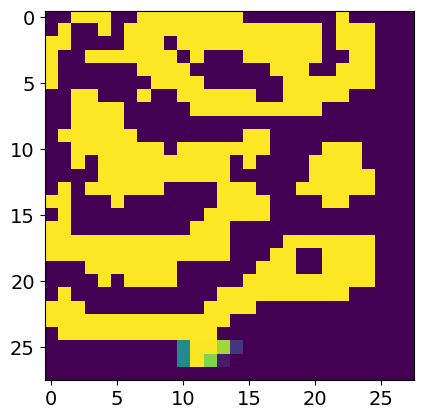

In [39]:
plt.imshow(X=x_test_adv[0].squeeze())